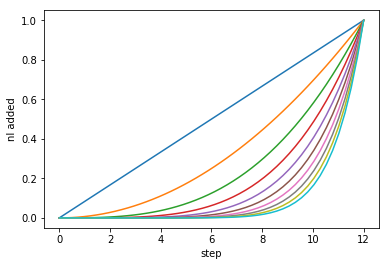

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

step = 2.5 # nl
maximum = 0.05 # v/v

x = np.linspace(0,12,50)
for i in np.linspace(1,10,10):
    y = np.power(x,i)
    y= y/y.max()
    plt.plot(x,y)
plt.xlabel('step')
plt.ylabel('nl added')

plt.show()

#2500 is max well

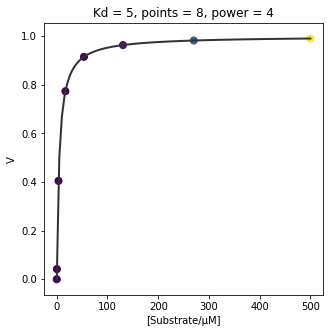

In [482]:
vmax = 1
km = 5
steps = 8
power = 4
###############
fig = plt.subplots(figsize=(5,5))
x = np.linspace(1,500, steps)
x = np.power(x,power)
x=x/x.max()*500
y = (vmax*x)/(km + x)
plt.scatter(x,y,
        s = 50,
           c = x**2)
x2 = np.linspace(0,500, 100)
y2 = (vmax*x2)/(km + x2)
plt.plot(x2,y2,
        color = '0.2',
        lw = 2)
plt.xlabel('[Substrate/µM]')
plt.ylabel('V')
plt.title('Kd = %d, points = %d, power = %d' %(km, steps, power)) 
#plt.axis('off')
plt.show()

In [162]:
steps = 12
power = 4
vol = 10 #µl

x = np.linspace(0,1, steps)
x = np.power(x,power)
x = x/x.max()*200   #normalize from 0-1, multiply by 200 =(500/2.5)
x = pd.DataFrame(x)
vols =(vol*x)/10 # nl
vols = np.ceil(vols)*2.5
vols

,0
0,0.0
1,2.5
2,2.5
3,5.0
4,10.0
5,22.5
6,45.0
7,82.5
8,140.0
9,225.0


In [252]:
data = pd.read_csv('20180913-Plate assay design - Plate 1 Layout (1).csv').drop(['Pattern',
                                                                            'Shake time/s',
                                                                           'Shake speed',
                                                                            'Plate ID'], 
                                                                            axis =1)
pd.DataFrame(columns = ['vol'])

#data.loc[0,:]
'''
for i in range(0,len(data)):
    print(i)
    print(data.loc[i,'Vol/µl'])
'''
#data.append(data.loc[1,:]) 

data

,Vol/µl,[prot]/µM,No.concs,Power
0,10,2,4,4
1,10,10,4,1
2,50,10,12,1
3,50,2,4,1
4,50,10,12,4
5,10,2,12,4
6,10,10,4,4
7,50,10,4,1
8,10,10,12,1
9,50,10,4,4


## For each well style (vol and conc) there are 32 wells used
This means 2 columns of the shortest axis, and 6 for 3 reps. This should work with the machine too hopefully

In [438]:
data

,Vol/µl,[prot]/µM,No.concs,Power
0,10,2,4,4
1,10,10,4,1
2,50,10,12,1
3,50,2,4,1
4,50,10,12,4
5,10,2,12,4
6,10,10,4,4
7,50,10,4,1
8,10,10,12,1
9,50,10,4,4


In [478]:
#[i for i in data['Power']]
#[i for i in data['No.concs']]

power = 4
vol = 10 #µl

def calc(vol, No.concs, x, power):
    x = np.linspace(0,1, 	No.concs)
    x = np.power(x,power)
    x = x/x.max()*200   #normalize from 0-1, multiply by 200 =(500/2.5)
    x = pd.DataFrame(x)
    vols =(vol*x)/10 # nl
    vols = np.ceil(vols)*2.5
    return vols


calc(1,4,10, 4).loc[1]

SyntaxError: invalid syntax (<ipython-input-478-cdada10c24ff>, line 7)

In [471]:
alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
layout = pd.DataFrame([i + str(j) for j in range(1,25) for i in alphabet], columns = ['Well'])

reps = 3
newdata = pd.DataFrame()

for i in range(0, reps):
    newdata = newdata.append(data)
newdata = newdata.sort_values(['Vol/µl','[prot]/µM']) #make version of data with replicates

arr2 = pd.DataFrame() # temporary thing
newdata = newdata.reset_index() #yeeeeeeaap

for i in range(0,len(newdata)): ##replicate each experimental run by number of concentrations
    for j in range(0,newdata.loc[i,'No.concs']):
        arr2 = arr2.append([newdata.loc[i]])
        
layout = pd.concat([layout,
                    arr2.reset_index().drop(['level_0', 'index'],
                        axis =1)],
                   axis = 1,
                   join = 'inner')
arr =[]
for i in newdata['No.concs']:
    for j in range(0,i):
        arr = np.append(arr, j)
arr = pd.Series(arr, name = 'Step')
layout['Step'] = arr
layout

,Well,Vol/µl,[prot]/µM,No.concs,Power,Step
0,A1,10,2,4,4,0.0
1,B1,10,2,4,4,1.0
2,C1,10,2,4,4,2.0
3,D1,10,2,4,4,3.0
4,E1,10,2,12,4,0.0
5,F1,10,2,12,4,1.0
6,G1,10,2,12,4,2.0
7,H1,10,2,12,4,3.0
8,I1,10,2,12,4,4.0
9,J1,10,2,12,4,5.0


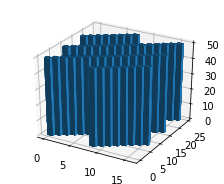

In [424]:
from mpl_toolkits.mplot3d import Axes3D


field = 'Vol/µl'
#field = '[prot]/µM'
pic = layout.loc[1*15-15:1*15,field]
for i in range(1,24):
    pic = pd.concat([pic,
                     layout.loc[i*15-15:i*15,field].reset_index(drop = True)],
                   axis = 1,
                   join = 'inner',
                   ignore_index = True)

#plt.imshow(pic)
#plt.title(str(field))

width = depth = 1
top = pic.unstack()
bottom = bottom = np.zeros_like(top)



fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(121, projection='3d')

ax.bar3d(yaxis, xaxis, bottom, width, depth, top, shade=True)


plt.show()

In [415]:
xaxis = pd.Series(range(0,24),
                 name = 'xaxis')
yaxis = pd.Series(range(0,16),
                 name = 'yaxis')

#yaxis
#np.shape(pic)
for i in range(0,23):
    yaxis = yaxis.append(pd.Series(range(0,16),
                 name = 'yaxis'))
    
for i in range(0,15):
    xaxis = xaxis.append(pd.Series(range(0,24),
                 name = 'xaxis'))
xaxis

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
0      0
1      1
2      2
3      3
4      4
5      5
      ..
18    18
19    19
20    20
21    21
22    22
23    23
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
Name: xaxis, Length: 384, dtype: int64

In [417]:
top

0   0     10
    1     10
    2     10
    3     10
    4     10
    5     10
    6     10
    7     10
    8     10
    9     10
    10    10
    11    10
    12    10
    13    10
    14    10
    15    10
1   0     10
    1     10
    2     10
    3     10
    4     10
    5     10
    6     10
    7     10
    8     10
    9     10
    10    10
    11    10
    12    10
    13    10
          ..
22  2     50
    3     50
    4     50
    5     50
    6     50
    7     50
    8     50
    9     50
    10    50
    11    50
    12    50
    13    50
    14    50
    15    50
23  0     50
    1     50
    2     50
    3     50
    4     50
    5     50
    6     50
    7     50
    8     50
    9     50
    10    50
    11    50
    12    50
    13    50
    14    50
    15    50
Length: 384, dtype: int64